
# Metadata, QA, QC

The purpose of this notebook is for ensuring the dataset underlying the WRCC aviation wind tool dataset meets SNAPs standards for metadata, quality assurance, and quality control.

# Metadata questionnaire

Timestamp:

In [ ]:
from datetime import datetime
print("Created on: {}".format(datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")))

## Time & place

#### Description of Geographic Extent

These data originate from weather stations within the U.S. State of Alaska. 

#### Place keywords

Alaska, statewide, arctic

#### Bounding coordinates:

This dataset is not explicitly spatially referenced, but bounding coordinates are provided from the station metadata:

In [1]:
import os
import pandas as pd

airport_meta = pd.read_csv("../data/airport_meta.csv")
lats = airport_meta["lat"].copy()
lons = airport_meta["lon"].copy()
lons[lons > 0] = -1 * (360 - lons[lons > 0])

print("Western bound:", round(lons.min(), 5), "° W")
print("Southern bound:", round(lats.min(), 5), "° N")
print("Eastern bound:", round(lons.max(), 5), "° W")
print("Northern bound:", round(lats.max(), 5), "° N")

Western bound: -185.88309 ° W
Southern bound: 51.87796 ° N
Eastern bound: -131.57223 ° W
Northern bound: 71.28257 ° N


#### Time period

In [2]:
base_dir = os.getenv("BASE_DIR")

stations = pd.read_pickle(os.path.join(base_dir, "stations.pickle"))

print("Earliest observation: ", stations["ts"].min())
print("Latest observation: ", stations["ts"].max())

Earliest observation:  1980-01-01 00:00:00
Latest observation:  2019-12-31 00:00:00


## Origin

### Info

#### Who created the data?

Kyle Redilla

#### Who owns the data?

Scenarios Network for Alaska + Arctic Planning

#### Email

kmredilla@alaska.edu

#### Address

2158 Koyukuk St, Fairbanks, AK 99709

### Credit

#### Other organizations who should get credit?

NOAA NCEI collected the original data. 

### About

#### Title

Historical hourly wind data for Alaska airports

#### Abstract

These wind speed and direction data are the underlying data displayed in the interactive webtool at [http://snap.uaf.edu/tools/airport-winds](http://snap.uaf.edu/tools/airport-winds). Original wind speed/direction observations were made by Automated Surface Observing System (ASOS) and the Automated Weather Observing System (AWOS) stations, and we accessed these data via the [Iowa Environmental Mesonet](https://mesonet.agron.iastate.edu/request/download.phtml) (IEM). These observations were hourly in most cases, and we filtered data to routine measurements (nearest to clock hour) where measurements were more frequent than hourly to generate a true hourly dataset, save for periods of missing data. We used data from 166 weather stations located across Alaska, selected from a pool of 185 stations available in the IEM database. For inclusion in the app and this dataset, a station must have a reasonably complete record, and must have begun measurements before June 6, 2010. We applied a spike-filtering algorithm to detect spurious spikes and dips, and a changepoint detection plus quantile mapping adjustment to statistically account for the possibility of sensors changing location, height, or surroundings such that the long term (month-scale) wind regimes were affected. 

#### Keywords

Alaska, airports, ASOS, AWOS, winds, wind speed, wind direction, quantile mapping

#### Purpose

These data were created by SNAP in collaboration with the Western Regional Climate Center for use in the ["Historical Winds at Alaska Airports" webtool](http://snap.uaf.edu/tools/airport-winds). 

#### File format

Comma-delimited

#### License

[Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)


#### Cross reference

[Historical and Projected Hourly Wind Data for Alaskan Communities, 1980-2099](http://ckan.snap.uaf.edu/dataset/historical-and-projected-hourly-wind-data-for-alaskan-communities-1980-2099)

### Methods

#### Protocols / methods used

All data processing was done using Python. We used the [`find_peaks`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function in the `signal` module of the `scipy` library to identify spurious spikes and dips in the hourly timeseries.

We used the `detection.Pelt` class$^{1}$ of the `ruptures` library for detecting changepoints in the wind data time series. 

We used the `BiasCorrection` class of the [`bias-correction`](https://pypi.org/project/bias-correction/) library for quantile mapping adjustment of wind speed data meriting correction after changepoint analysis. 

##### References

1. R. Killick, P. Fearnhead, and I. Eckley. Optimal detection of changepoints with a linear computational cost. Journal of the American Statistical Association, 107(500):1590–1598, 2012.

#### Processing steps

The complete data processing is done by the code in the `pipeline/` sub-directory of this repository: https://github.com/ua-snap/wrcc-wind-tool. A high-level overview of the processing steps taken to obtain these hosted base data:
    
* Download the raw ASOS/AWOS data
* Process the raw data to clean it up (filter to hourly, remove spurious data, adjust heterogeneous time series via quantile mapping
    
#### Base data

The IEM houses data collected by the Automated Surface Observing System network and the Automated Weather Observing System networks. We accessed wind speed (mph) and wind direction (degrees from true north) taken from all METAR observations made by all stations on the "Alaska ASOS" (AK_ASOS) network recorded between 1980-01-01 00:00:00 and 2019-12-31 00:00:00.

## Data

This dataset is a collection of .CSV files, and all of a station's data is in a single file. 

#### Entity

The files each have three columns: "ts", "ws", and "wd", corresponding to the full timestamp of the clock hour nearest to the recorded observation, the adjusted wind speed, and the wind direction, respectively.

Below is the printout of an example data file:

In [314]:
from pathlib import Path

# read from ckan_data_package in BASE_DIR
base_dir = Path(os.getenv("BASE_DIR"))
ckan_dir = base_dir.joinpath("ckan_data_package")

fp = list(ckan_dir.glob("*"))[0]
df = pd.read_csv(fp)
print("Example data file: ", Path(fp).name)
display(df.head(10))

Example data file:  alaska_airports_hourly_winds_PAEM.csv


,ts,ws,wd
0,1980-01-01 01:00:00,4.60,110.0
1,1980-01-02 01:00:00,5.75,80.0
2,1980-01-02 06:00:00,4.60,100.0
3,1980-01-02 17:00:00,5.75,100.0
4,1980-01-02 20:00:00,5.75,100.0
5,1980-01-03 01:00:00,4.60,100.0
6,1980-01-03 19:00:00,6.90,110.0
7,1980-01-03 21:00:00,9.20,110.0
8,1980-01-04 01:00:00,11.50,110.0
9,1980-01-04 03:00:00,11.50,110.0


#### Spatial reference

NA

#### Attributes

NA

# Quality assurance, quality control

## Quality assurance

Demonstrate that these data are accessible by reading them from memory and creating a few summary examples.

#### Plot monthly average wind speed and direction time series for Fairbanks International Airport

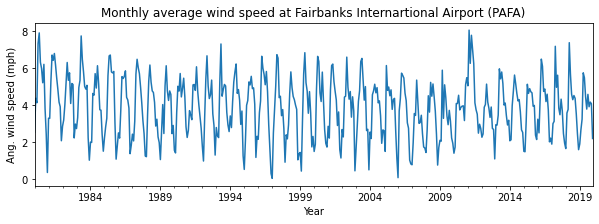

In [315]:
import matplotlib.pyplot as plt

fp = list(ckan_dir.glob("*PAFA*"))[0]
df = pd.read_csv(fp)
df["ym"] = pd.to_datetime(df["ts"]).dt.to_period("M")
plt.figure(figsize=(10,3))
df.groupby("ym")["ws"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Ang. wind speed (mph)")
plt.title("Monthly average wind speed at Fairbanks Internartional Airport (PAFA)")
plt.show()

#### Plot histograms of wind direction for Juneau Intl Airport (PAJN), Ted Stevens Anchorage International Airport (PANC), and Barter Island Long Range Radar Service Airport (PABA)

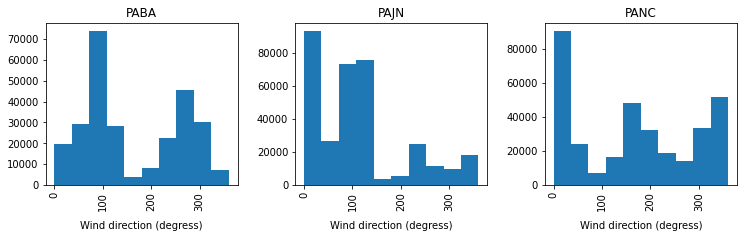

In [316]:
def wrap_read(fp):
    """wrap pd.read_csv to add ICAO identifier"""
    df = pd.read_csv(fp)
    df["sid"] = fp.split("_")[-1].split(".")[0]
    
    return df

fps = [str(fp).replace("PAFA", icao) for icao in ["PAJN", "PANC", "PABA"]]
df = pd.concat([wrap_read(fp) for fp in fps])

axarr = df.hist("wd", "sid", figsize=(12, 3), layout=(1, 3), sharex=True)
for ax in axarr:
    ax.set_xlabel("Wind direction (degress)", labelpad=10)
plt.show()

## Quality control

#### Outliers and value errors

Ensure that all wind speed and direction data are within reasonable bounds. 

In [509]:
import numpy as np

# read all distributed files
fps = list(ckan_dir.glob("*.csv"))
df = pd.concat([wrap_read(str(fp)) for fp in fps])

print(f"Max. wind speed: {np.max(df['ws'].max())}")
print(f"Min. wind speed: {np.min(df['ws'].min())}")
print(f"Max. wind direction: {np.max(df['wd'].max())}")
print(f"Min. wind direction: {np.min(df['wd'].min())}")

Max. wind speed: 104.62
Min. wind speed: 0.0
Max. wind direction: 360.0
Min. wind direction: 0.0


#### Consistency with webapp

Check that visualizations in the app match the underlying data that is being hosted. 

##### Summary wind rose

Verify the following values for the summary wind rose of Fairbanks international Airport (PAFA):  
  
Calms: 40%  

0-6 mph winds from N:
* 10 degree bins: 3.75
* 22.5 degree bins: 9.22%
* 45 degree bins: 14.43%

In [510]:
pafa = df[df["sid"] == "PAFA"].dropna()

n = pafa["ws"].shape[0]
calms = pafa[pafa["ws"] == 0]["ws"].shape[0] / n
print(f"PAFA calms: {round(calms * 100)}%\n")

n_obs = pafa[pafa["ws"] > 0].shape[0]

x1 = pafa[
    ((pafa["ws"] > 0) & (pafa["ws"] <= 6)) & 
    ((pafa["wd"] > 356) | (pafa["wd"] < 5))
].shape[0] / n_obs

x2 = pafa[
    ((pafa["ws"] > 0) & (pafa["ws"] <= 6)) & 
    ((pafa["wd"] > 348.75) | (pafa["wd"] < 11.25))
].shape[0] / n_obs

x3 = pafa[
    ((pafa["ws"] > 0) & (pafa["ws"] <= 6)) & 
    ((pafa["wd"] > 337.5) | (pafa["wd"] < 22.5))
].shape[0] / n_obs

print("0-6 mph winds from N")
print(f"10 degree bins: {round(x1 * 100, 2)}%")
print(f"22.5 degree bins: {round(x2 * 100, 2)}%")
print(f"45 degree bins: {round(x3 * 100, 2)}%")

PAFA calms: 40%

0-6 mph winds from N
10 degree bins: 3.75%
22.5 degree bins: 9.22%
45 degree bins: 14.43%


##### Monthly wind rose

Verify the following values for the February monthly wind rose for Ted Stevens Anchorage International Airport (PANC):  
Calms: 18%  

6-10 mph winds from W:

* 10 degree bins: 0.28%
* 22.5 degree bins: 0.78%
* 45 degree bins: 1.51%

In [511]:
panc = df[df["sid"] == "PANC"].dropna()
panc["ts"] = pd.to_datetime(panc["ts"])
panc["month"] = panc["ts"].dt.month
panc = panc[panc["month"] == 2]

n = panc["ws"].shape[0]
calms = panc[panc["ws"] == 0]["ws"].shape[0] / n
print(f"PANC Feb calms: {round(calms * 100)}%\n")

n_obs = panc[panc["ws"] > 0].shape[0]

x1 = panc[
    ((panc["ws"] >= 6) & (panc["ws"] <= 10)) & 
    ((panc["wd"] > 265) & (panc["wd"] < 275))
].shape[0] / n_obs

x2 = panc[
    ((panc["ws"] >= 6) & (panc["ws"] <= 10)) & 
    ((panc["wd"] > 258.75) & (panc["wd"] < 281.25))
].shape[0] / n_obs

x3 = panc[
    ((panc["ws"] >= 6) & (panc["ws"] <= 10)) & 
    ((panc["wd"] > 247.5) & (panc["wd"] < 292.5))
].shape[0] / n_obs

print("6-10 mph winds from W")
print(f"10 degree bins: {round(x1 * 100, 2)}%")
print(f"22.5 degree bins: {round(x2 * 100, 2)}%")
print(f"45 degree bins: {round(x3 * 100, 2)}%")

PANC Feb calms: 18%

6-10 mph winds from W
10 degree bins: 0.28%
22.5 degree bins: 0.78%
45 degree bins: 1.51%


##### Threshold exceedance

Verify the following values for the threshold exceedance for Deadhorse Airport:

Runway direction 100 degrees:
* Class A-I and B-I: 11.78%
* Class A-II and B-II: 4.68%
* class A-III, B-III, C-I through C-III, D-I through D-III: 1.38%

In [513]:
pasc = df[df["sid"] == "PASC"].dropna()

thresholds = np.round(np.array([10.5, 13, 16]) * 1.15078, 2)

def crosswind_component(ws, wd, d=100):
    import math
    """Compute crosswind component(s), ws and wd may be arrays"""
    angles = ((wd - d) + 180) % 360 - 180
    return np.round(
        np.array([abs(math.sin(math.radians(a)) * w) for a, w in zip(angles, ws)]), 2
    )

crosswinds = crosswind_component(pasc["ws"], pasc["wd"])
n = crosswinds.shape[0]
exc = [round((crosswinds > threshold).sum() / n, 4) * 100 for threshold in thresholds]

print("Results from hosting data:")
print(f"Class A-I and B-I: {exc[0]}%")
print(f"Class A-II and B-II: {exc[1]}%")
print(f"Class A-III, B-III, C-I through C-III, D-I through D-III: {exc[2]}%")

Results from hosting data:
Class A-I and B-I: 11.78%
Class A-II and B-II: 4.68%
Class A-III, B-III, C-I through C-III, D-I through D-III: 1.38%


##### Wind power

Verify the following values for the mean monthly wind power for September at Nome Airport:

Max: 1233     
September 2019: 1140  
Upper fence: 1041  
Q3: 718.75  
Median: 636  
Q1: 472.5  
Min: 240  

In [578]:
paom = df[df["sid"] == "PAOM"].dropna()
paom["ts"] = pd.to_datetime(paom["ts"])
paom["month"] = paom["ts"].dt.month
paom["year"] = paom["ts"].dt.year
paom["ws"] = paom["ws"].astype(np.float32) / 2.237
# adjust for height using the log-law: https://websites.pmc.ucsc.edu/~jnoble/wind/extrap/
# v ~ v_ref * log(z / z_0) / log(z_ref / z_0) where
# z_0 = 0.5 (roughness length of 0.0005 for "airport" landscape type),
# z_ref = 10, known speed height (10m)
# z = 100, approx height of typical wind turbine
# v_ref is the known speed at z_ref height
z = 100
z_ref = 10
z_0 = 0.5
paom["ws"] = paom["ws"] * (np.log(z / z_0) / np.log(z_ref / z_0))
# compute wind energy potential using this:https://byjus.com/wind-energy-formula/
# rho is air density constant
rho = 1.23
paom["wep"] = 0.5 * rho * paom["ws"] ** 3
wep = paom.drop(columns=["ws", "wd"])
mean_wep = wep.groupby(["sid", "year", "month"]).mean().reset_index()
mean_wep["wep"] = np.round(mean_wep["wep"])
mean_wep = mean_wep[mean_wep["month"] == 9]

outlier_thresholds = (
    mean_wep.groupby(["sid", "month"])["wep"]
    .std()
    .reset_index()
    .rename(columns={"wep": "std"})
)
outlier_thresholds["std"] = outlier_thresholds["std"] * 5
mean_wep = mean_wep.merge(outlier_thresholds, on=["sid", "month"])
mean_wep = mean_wep[mean_wep["wep"] < mean_wep["std"]].drop(columns="std")

# plotly doesn't use numpy.quantile method for interpolation. 
# Someone in the Plotly community developed this function for recreating plotly's quartiles
# https://community.plotly.com/t/boxplot-quartile-seems-wrong/2234/9
def plotly_linear_quantiles(y, quantile):
    """
        Based on #10 here: http://jse.amstat.org/v14n3/langford.html
        METHOD 10 (“H&L-2”): The Pth percentile value is found by taking that 
        value with #(np + 0.5). If this is not an integer, take the interpolated
        value between 'the floor' and 'the ceiling of that value'. As an example, 
        if S5 = (1, 2, 3, 4, 5) and p = 0.25, then #(np + 0.5) = #(1.75) and so Q1 = 1.75.
        
        args: 
        y: list to calculate quantile for
        quantile: requested quantile value between 0 and 1
    """
    # -1 because becuase we count starting at 0
    interp_val_x = len(y)*quantile + 0.5 - 1 
    if interp_val_x.is_integer():
        # int() to remove decimal
        return sorted(y)[int(interp_val_x)]
    else:
        return np.interp(interp_val_x, [x for x in range(len(y))], sorted(y))

quartiles = [plotly_linear_quantiles(mean_wep["wep"], q) for q in (0.25, .5, .75)]
iqr = quartiles[2] - quartiles[0]

print("Manually calculated values:")
print(f"Max.: {mean_wep['wep'].max()}")
print(f"September 2019: {mean_wep[mean_wep['year'] == 2019]['wep'].values[0]}")
print(f"Upper fence: {quartiles[2] + (1.5 * iqr)}")
print(f"Q3: {quartiles[2]}")
print(f"Median: {quartiles[1]}")
print(f"Q1: {quartiles[0]}")
print(f"Min.: {mean_wep['wep'].min()}")

Manually calculated values:
Max.: 1233.0
September 2019: [1140.]
Upper fence: 369.375
Q3: 718.75
Median: 636.0
Q1: 472.5
Min.: 240.0
